### Gráfica para Inscripciones Mensuales de Miembros

In [241]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [242]:
#leemos el csv
voluntarios = pd.read_csv('../tablas/voluntarios.csv', index_col=0)
voluntarios.head(3)

,nombre,apellidos,nombreApellidos,movil,codigoPostal,pass,perfil,serviciosDisponibles,status,fotoV,bio,fechaInscripcion,estrellas,nOpinion
0,Feliciana,Cantón,Feliciana Cantón,694747145,40331,44349840,Voluntario,"['Nuevas Tecnologías', 'Burocracia', 'Servicio...",1,hombre2.png,Soy una persona muy atenta. Me gusta aportar m...,19/11/2019,5.0,1
1,Amador,Llopis,Amador Llopis,607054985,44587,23964109,Voluntario,"['Nuevas Tecnologías', 'El día a día', 'Burocr...",1,mujer1.png,"Me gusta trabajar con otras personas, codo con...",28/05/2020,2.0,1
2,Jose Ignacio,Godoy,Jose Ignacio Godoy,682114060,22612,81577056,Voluntario,"['Nuevas Tecnologías', 'Salud', 'Amigos y Ocio...",1,mujer1.png,"Me gusta trabajar con otras personas, codo con...",10/02/2020,3.0,1


In [243]:
#comprobamos nombres de columnas
voluntarios.columns

Index(['nombre', 'apellidos', 'nombreApellidos', 'movil', 'codigoPostal',
       'pass', 'perfil', 'serviciosDisponibles', 'status', 'fotoV', 'bio',
       'fechaInscripcion', 'estrellas', 'nOpinion'],
      dtype='object')

In [244]:
#comprobamos types
voluntarios.dtypes

nombre                   object
apellidos                object
nombreApellidos          object
movil                     int64
codigoPostal              int64
pass                      int64
perfil                   object
serviciosDisponibles     object
status                    int64
fotoV                    object
bio                      object
fechaInscripcion         object
estrellas               float64
nOpinion                  int64
dtype: object

In [245]:
#pasamos la columna de fechas a datetime
voluntarios['fechaInscripcion'] = pd.to_datetime(voluntarios['fechaInscripcion'])

In [246]:
#comprobamos el cambio
voluntarios.dtypes

nombre                          object
apellidos                       object
nombreApellidos                 object
movil                            int64
codigoPostal                     int64
pass                             int64
perfil                          object
serviciosDisponibles            object
status                           int64
fotoV                           object
bio                             object
fechaInscripcion        datetime64[ns]
estrellas                      float64
nOpinion                         int64
dtype: object

In [247]:
#eliminamos las columnas innecesarias
'''voluntarios=voluntarios.drop(['nombre', 'apellidos', 'movil','pass', 'fotoMiembro'], axis=1)
voluntarios'''

"voluntarios=voluntarios.drop(['nombre', 'apellidos', 'movil','pass', 'fotoMiembro'], axis=1)\nvoluntarios"

In [248]:
#ordenamos por fecha de inscripcion
voluntarios.sort_values(by='fechaInscripcion', inplace=True)

In [249]:
#volvemos a pasar las fechas a string
voluntarios['fechaInscripcion']=voluntarios['fechaInscripcion'].astype(str)

In [250]:
print(voluntarios.dtypes)
voluntarios

nombre                   object
apellidos                object
nombreApellidos          object
movil                     int64
codigoPostal              int64
pass                      int64
perfil                   object
serviciosDisponibles     object
status                    int64
fotoV                    object
bio                      object
fechaInscripcion         object
estrellas               float64
nOpinion                  int64
dtype: object


,nombre,apellidos,nombreApellidos,movil,codigoPostal,pass,perfil,serviciosDisponibles,status,fotoV,bio,fechaInscripcion,estrellas,nOpinion
29,Crescencia,Fernandez,Crescencia Fernandez,610589320,15218,53377241,Voluntario,"['Nuevas Tecnologías', 'Salud', 'Amigos y Ocio...",0,hombre2.png,Quiero devolver a la comunidad lo que me diero...,2019-01-07,4.0,1
9,Eligia,Amor,Eligia Amor,657614171,29010,77216346,Ambos,"['Nuevas Tecnologías', 'Amigos y Ocio', 'El dí...",0,hombre2.png,Me encanta sertirme útil y por eso estaría enc...,2019-01-07,2.0,1
234,Casandra,Castejón,Casandra Castejón,619373364,26291,44477305,Ambos,"['Salud', 'Burocracia']",1,hombre1.png,"Me gusta trabajar con otras personas, codo con...",2019-01-09,1.5,2
486,Francisco,Piñeiro,Francisco Piñeiro,631593690,50683,72694472,Voluntario,"['Salud', 'El día a día', 'Servicios del Munic...",1,hombre1.png,Quiero devolver a la comunidad lo que me diero...,2019-01-09,4.0,1
118,Paulino,Roda,Paulino Roda,613910581,5154,37818740,Ambos,"['Amigos y Ocio', 'Burocracia']",1,hombre1.png,"Me gusta trabajar con otras personas, codo con...",2019-01-09,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Rosario,Lastra,Rosario Lastra,686478109,42145,87016038,Voluntario,"['Nuevas Tecnologías', 'Burocracia', 'Servicio...",1,mujer2.png,Soy una persona muy atenta. Me gusta aportar m...,2022-10-04,5.0,1
157,Maximiano,Julián,Maximiano Julián,629470872,24760,43107968,Voluntario,"['Salud', 'El día a día', 'Servicios del Munic...",1,mujer1.png,Soy una persona a la que le fascina conocer pe...,2022-10-05,3.0,2
130,Venceslás,Cabañas,Venceslás Cabañas,640338725,18292,37937627,Voluntario,"['Nuevas Tecnologías', 'Salud', 'Servicios del...",1,hombre1.png,Soy una persona a la que le fascina conocer pe...,2022-10-05,3.0,2
162,Úrsula,Belmonte,Úrsula Belmonte,612331873,34468,14152370,Voluntario,"['Salud', 'Amigos y Ocio']",0,mujer2.png,"Me gusta trabajar con otras personas, codo con...",2022-11-03,1.5,2


In [251]:
#eliminamos los dias de la fecha
voluntarios['fechaInscripcion'] = voluntarios['fechaInscripcion'].str.slice_replace(7, repl='')

In [252]:
voluntarios

,nombre,apellidos,nombreApellidos,movil,codigoPostal,pass,perfil,serviciosDisponibles,status,fotoV,bio,fechaInscripcion,estrellas,nOpinion
29,Crescencia,Fernandez,Crescencia Fernandez,610589320,15218,53377241,Voluntario,"['Nuevas Tecnologías', 'Salud', 'Amigos y Ocio...",0,hombre2.png,Quiero devolver a la comunidad lo que me diero...,2019-01,4.0,1
9,Eligia,Amor,Eligia Amor,657614171,29010,77216346,Ambos,"['Nuevas Tecnologías', 'Amigos y Ocio', 'El dí...",0,hombre2.png,Me encanta sertirme útil y por eso estaría enc...,2019-01,2.0,1
234,Casandra,Castejón,Casandra Castejón,619373364,26291,44477305,Ambos,"['Salud', 'Burocracia']",1,hombre1.png,"Me gusta trabajar con otras personas, codo con...",2019-01,1.5,2
486,Francisco,Piñeiro,Francisco Piñeiro,631593690,50683,72694472,Voluntario,"['Salud', 'El día a día', 'Servicios del Munic...",1,hombre1.png,Quiero devolver a la comunidad lo que me diero...,2019-01,4.0,1
118,Paulino,Roda,Paulino Roda,613910581,5154,37818740,Ambos,"['Amigos y Ocio', 'Burocracia']",1,hombre1.png,"Me gusta trabajar con otras personas, codo con...",2019-01,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Rosario,Lastra,Rosario Lastra,686478109,42145,87016038,Voluntario,"['Nuevas Tecnologías', 'Burocracia', 'Servicio...",1,mujer2.png,Soy una persona muy atenta. Me gusta aportar m...,2022-10,5.0,1
157,Maximiano,Julián,Maximiano Julián,629470872,24760,43107968,Voluntario,"['Salud', 'El día a día', 'Servicios del Munic...",1,mujer1.png,Soy una persona a la que le fascina conocer pe...,2022-10,3.0,2
130,Venceslás,Cabañas,Venceslás Cabañas,640338725,18292,37937627,Voluntario,"['Nuevas Tecnologías', 'Salud', 'Servicios del...",1,hombre1.png,Soy una persona a la que le fascina conocer pe...,2022-10,3.0,2
162,Úrsula,Belmonte,Úrsula Belmonte,612331873,34468,14152370,Voluntario,"['Salud', 'Amigos y Ocio']",0,mujer2.png,"Me gusta trabajar con otras personas, codo con...",2022-11,1.5,2


In [253]:
#hacemos groupby por meses y contamos la cantidad de personas inscritas
inscripciones_mensuales_v= voluntarios.groupby('fechaInscripcion')['nombreApellidos'].count()
inscripciones_mensuales_v=inscripciones_mensuales_v.to_frame()
print(inscripciones_mensuales_v.shape)
print(inscripciones_mensuales_v.head(5))
print(inscripciones_mensuales_v.tail(5))

(48, 1)
                  nombreApellidos
fechaInscripcion                 
2019-01                         6
2019-02                         3
2019-03                         2
2019-04                         4
2019-05                        11
                  nombreApellidos
fechaInscripcion                 
2022-08                         1
2022-09                         2
2022-10                         4
2022-11                         1
2022-12                         1


In [254]:
#ponemos el indice como columna
inscripciones_mensuales_v = inscripciones_mensuales_v.reset_index()
inscripciones_mensuales_v.head()

,fechaInscripcion,nombreApellidos
0,2019-01,6
1,2019-02,3
2,2019-03,2
3,2019-04,4
4,2019-05,11


In [255]:
#cambiamos el nombre d ela columna
inscripciones_mensuales_v=inscripciones_mensuales_v.rename(columns={'nombreApellidos':'nPersonasInscritas'})
print(inscripciones_mensuales_v.shape)
inscripciones_mensuales_v=inscripciones_mensuales_v.iloc[:31, :]
inscripciones_mensuales_v.tail(10)

(48, 2)


,fechaInscripcion,nPersonasInscritas
21,2020-10,10
22,2020-11,14
23,2020-12,23
24,2021-01,12
25,2021-02,12
26,2021-03,9
27,2021-04,19
28,2021-05,9
29,2021-06,16
30,2021-07,11


In [256]:
#guardamos la tabla como csv
inscripciones_mensuales_v.to_csv('inscripciones_mensuales_v.csv', index=False)

In [257]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{'secondary_y': False}]])

fig.add_trace(
    go.Scatter(
    x = inscripciones_mensuales_v['fechaInscripcion'],
    y = inscripciones_mensuales_v['nPersonasInscritas'],
    name = 'Nº Personas Inscritas',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
)

fig.update_layout(
    title_text='Personas Inscritas por Mes'
)

fig.update_xaxes(title_text='Meses de 01/2019 a 12/2022')

fig.update_yaxes(title_text='Nº Voluntarios Inscritos')

fig.show()


In [258]:
fig = px.bar(inscripciones_mensuales_v, y='nPersonasInscritas', x='fechaInscripcion')

fig.update_xaxes(title_text='Meses de 01/2019 a 12/2022')

fig.update_yaxes(title_text='Nº Voluntarios Inscritos')

fig.show()

### Gráfico de nº Voluntarios por Valoración

In [259]:
#hacemos groupby por meses y contamos la cantidad de voluntarios por cada valoracion
voluntarios_estrellas= voluntarios.groupby('estrellas')['nombreApellidos'].count()
voluntarios_estrellas=voluntarios_estrellas.to_frame()
print(voluntarios_estrellas.shape)
print(voluntarios_estrellas.tail(5))

(9, 1)
           nombreApellidos
estrellas                 
3.0                     82
3.5                     26
4.0                     87
4.5                     14
5.0                     75


In [260]:
#ponemos el indice como columna
voluntarios_estrellas = voluntarios_estrellas.reset_index()
voluntarios_estrellas.head()

,estrellas,nombreApellidos
0,1.0,73
1,1.5,21
2,2.0,91
3,2.5,31
4,3.0,82


In [261]:
#cambiamos el nombre de la columna
voluntarios_estrellas=voluntarios_estrellas.rename(columns={'nombreApellidos':'Nº Voluntarios por Valoracion'})
voluntarios_estrellas.head()

,estrellas,Nº Voluntarios por Valoracion
0,1.0,73
1,1.5,21
2,2.0,91
3,2.5,31
4,3.0,82


In [262]:
fig = px.pie(voluntarios_estrellas, values='Nº Voluntarios por Valoracion', names='estrellas', title='Nº de Voluntarios por Valoracion')
fig.show()

### Modelos de predicción


In [263]:
#inscripciones_mensuales=inscripciones_mensuales.set_index('fechaInscripcion')
print(inscripciones_mensuales_v.shape)
inscripciones_mensuales_v

(31, 2)


,fechaInscripcion,nPersonasInscritas
0,2019-01,6
1,2019-02,3
2,2019-03,2
3,2019-04,4
4,2019-05,11
5,2019-06,7
6,2019-07,8
7,2019-08,8
8,2019-09,10
9,2019-10,7


<AxesSubplot:>

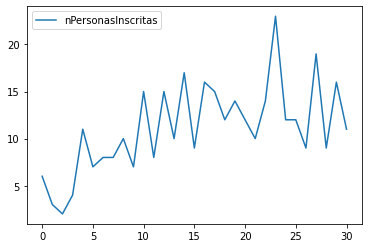

In [264]:
inscripciones_mensuales_v.plot()

### Preparamos features del dataset

In [265]:
for i in range(12,0,-1):
    inscripciones_mensuales_v['t-'+str(i)] = inscripciones_mensuales_v['nPersonasInscritas'].shift(i)

In [266]:
inscripciones_mensuales_v.dropna(inplace=True)
inscripciones_mensuales_v.head(15)

,fechaInscripcion,nPersonasInscritas,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
12,2020-01,15,6.0,3.0,2.0,4.0,11.0,7.0,8.0,8.0,10.0,7.0,15.0,8.0
13,2020-02,10,3.0,2.0,4.0,11.0,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0
14,2020-03,17,2.0,4.0,11.0,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0
15,2020-04,9,4.0,11.0,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0
16,2020-05,16,11.0,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0
17,2020-06,15,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0
18,2020-07,12,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0
19,2020-08,14,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0,12.0
20,2020-09,12,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0,12.0,14.0
21,2020-10,10,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0,12.0,14.0,12.0


In [267]:
inscripciones_mensuales_v.tail(15)

,fechaInscripcion,nPersonasInscritas,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
16,2020-05,16,11.0,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0
17,2020-06,15,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0
18,2020-07,12,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0
19,2020-08,14,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0,12.0
20,2020-09,12,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0,12.0,14.0
21,2020-10,10,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0,12.0,14.0,12.0
22,2020-11,14,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0,12.0,14.0,12.0,10.0
23,2020-12,23,8.0,15.0,10.0,17.0,9.0,16.0,15.0,12.0,14.0,12.0,10.0,14.0
24,2021-01,12,15.0,10.0,17.0,9.0,16.0,15.0,12.0,14.0,12.0,10.0,14.0,23.0
25,2021-02,12,10.0,17.0,9.0,16.0,15.0,12.0,14.0,12.0,10.0,14.0,23.0,12.0


In [268]:
inscripciones_mensuales_v=inscripciones_mensuales_v.set_index('fechaInscripcion')
print(inscripciones_mensuales_v.shape)
inscripciones_mensuales_v

(19, 13)


,nPersonasInscritas,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
fechaInscripcion,,,,,,,,,,,,,
2020-01,15,6.0,3.0,2.0,4.0,11.0,7.0,8.0,8.0,10.0,7.0,15.0,8.0
2020-02,10,3.0,2.0,4.0,11.0,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0
2020-03,17,2.0,4.0,11.0,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0
2020-04,9,4.0,11.0,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0
2020-05,16,11.0,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0
2020-06,15,7.0,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0
2020-07,12,8.0,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0
2020-08,14,8.0,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0,12.0
2020-09,12,10.0,7.0,15.0,8.0,15.0,10.0,17.0,9.0,16.0,15.0,12.0,14.0


### Dividimos en Train y Test

In [269]:
X = inscripciones_mensuales_v.iloc[:,1:].values
y = inscripciones_mensuales_v.iloc[:, 0].values

X_train = X[:15]
X_test = X[15:]
y_train = y[:15]
y_test = y[15:]

print("Shape X_train:", X_train.shape)
print("Shape X_test", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (15, 12)
Shape X_test (4, 12)
Shape y_train: (15,)
Shape y_test: (4,)


In [270]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11
0,9.0,16.0,15.0,12.0,14.0,12.0,10.0,14.0,23.0,12.0,12.0,9.0
1,16.0,15.0,12.0,14.0,12.0,10.0,14.0,23.0,12.0,12.0,9.0,19.0
2,15.0,12.0,14.0,12.0,10.0,14.0,23.0,12.0,12.0,9.0,19.0,9.0
3,12.0,14.0,12.0,10.0,14.0,23.0,12.0,12.0,9.0,19.0,9.0,16.0


### Modelos de predicción

In [271]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [272]:
def prediction(model, x_test):
    preds = x_test[0]
    preds_out = []
    
    for i in range(len(X_test)):
        pred = model.predict([preds])[0]
        preds_out.append(pred)
        
        preds2 = np.array([preds[1:]]) # quitamos t-12 ya no se usa
        
        preds = np.c_[preds2, np.array([pred])][0]
        
    return preds_out

In [273]:
preds = prediction(tree, X_test)
preds

[14.0, 9.0, 16.0, 10.0]

In [274]:
y_test

array([19,  9, 16, 11], dtype=int64)

In [275]:
#Creamos un dataframe con y_test y pred
preds_df=pd.DataFrame(preds)

y_test_df = pd.DataFrame(y_test.tolist())

meses= pd.DataFrame(['Apr', 'May', 'Jun', 'Jul'])

y_test_preds_df=pd.concat([meses, preds_df, y_test_df], axis=1)

y_test_preds_df.columns = ['meses', 'predicciones', 'inscripciones']

y_test_preds_df

,meses,predicciones,inscripciones
0,Apr,14.0,19
1,May,9.0,9
2,Jun,16.0,16
3,Jul,10.0,11


In [276]:
fig = make_subplots(specs=[[{"secondary_y": False}]])

fig.add_trace(
    go.Scatter(
    x = y_test_preds_df['meses'],
    y = y_test_preds_df['inscripciones'],
    name = 'Nº Voluntarios Inscritos Real',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
)
fig.add_trace(
    go.Scatter(
    x = y_test_preds_df['meses'],
    y = y_test_preds_df['predicciones'],
    name = 'Nº Voluntarios Inscritos Pred',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(30, 26, 255, 0.8)'))
)

fig.update_layout(
    title_text='Predicción a 4 meses de Voluntarios Inscritos'
)

fig.update_xaxes(title_text='Meses de 04/2022 a 07/2022')

fig.update_yaxes(title_text='Nº Voluntarios Inscritas')

fig.show()

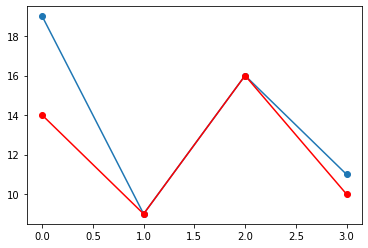

In [277]:
plt.plot(y_test,'o-')
plt.plot(preds,'o-',color='red')

### Random Forest

In [278]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, max_depth=5)
rfr.fit(X_train, y_train)

preds2 = prediction(rfr, X_test) # tengo que predecir uno a uno
print("MSE:", mean_squared_error(preds2, y_test))

MSE: 18.456692323022956


In [279]:
#Creamos un dataframe con y_test y pred
preds2_df=pd.DataFrame(preds2)

#y_test_df = pd.DataFrame(y_test.tolist())

#meses= pd.DataFrame(['Apr', 'May', 'Jun', 'Jul'])

y_test_preds2_df=pd.concat([meses, preds2_df, y_test_df], axis=1)

y_test_preds2_df.columns = ['meses', 'predicciones', 'inscripciones']

y_test_preds2_df=y_test_preds2_df.round(0)
y_test_preds2_df

,meses,predicciones,inscripciones
0,Apr,13.0,19
1,May,12.0,9
2,Jun,11.0,16
3,Jul,13.0,11


In [280]:
fig = make_subplots(specs=[[{"secondary_y": False}]])

fig.add_trace(
    go.Scatter(
    x = y_test_preds2_df['meses'],
    y = y_test_preds2_df['inscripciones'],
    name = 'Nº Voluntarios Inscritos Real',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
)
fig.add_trace(
    go.Scatter(
    x = y_test_preds2_df['meses'],
    y = y_test_preds2_df['predicciones'],
    name = 'Nº Voluntarios Inscritos Pred',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(30, 26, 255, 0.8)'))
)

fig.update_layout(
    title_text='Predicción a 4 meses de Voluntarios Inscritos'
)

fig.update_xaxes(title_text='Meses de 04/2022 a 07/2022')

fig.update_yaxes(title_text='Nº Voluntarios Inscritas')

fig.show()

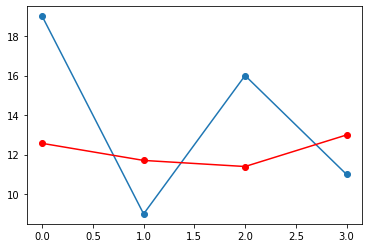

In [281]:
plt.plot(y_test, "o-")
plt.plot(preds2, "o-", color="red")

### Regresión Lineal

In [282]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred1 = lin_reg.predict(X_test) # no hay por qué hacerlo
print("MSE:", mean_squared_error(pred1, y_test))

pred2 = prediction(lin_reg, X_test) # predigo uno a uno
print("MSE:", mean_squared_error(pred2, y_test))

MSE: 221.89561670912488
MSE: 227.00528279254323


In [283]:
#Creamos un dataframe con y_test y pred
pred2_df=pd.DataFrame(pred2)

#y_test_df = pd.DataFrame(y_test.tolist())

#meses= pd.DataFrame(['Apr', 'May', 'Jun', 'Jul'])

y_test_pred2_df=pd.concat([meses, pred2_df, y_test_df], axis=1)

y_test_pred2_df.columns = ['meses', 'predicciones', 'inscripciones']

y_test_pred2_df=y_test_pred2_df.round(0)
y_test_pred2_df

,meses,predicciones,inscripciones
0,Apr,3.0,19
1,May,17.0,9
2,Jun,37.0,16
3,Jul,22.0,11


In [284]:
fig = make_subplots(specs=[[{"secondary_y": False}]])

fig.add_trace(
    go.Scatter(
    x = y_test_pred2_df['meses'],
    y = y_test_pred2_df['inscripciones'],
    name = 'Nº Voluntarios Inscritos Real',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
)
fig.add_trace(
    go.Scatter(
    x = y_test_pred2_df['meses'],
    y = y_test_pred2_df['predicciones'],
    name = 'Nº Voluntarios Inscritos Pred',
    mode = 'lines+markers',
    marker = dict(color = 'rgba(30, 26, 255, 0.8)'))
)

fig.update_layout(
    title_text='Predicción a 4 meses de Voluntarios Inscritos'
)

fig.update_xaxes(title_text='Meses de 04/2022 a 07/2022')

fig.update_yaxes(title_text='Nº Voluntarios Inscritas')

fig.show()

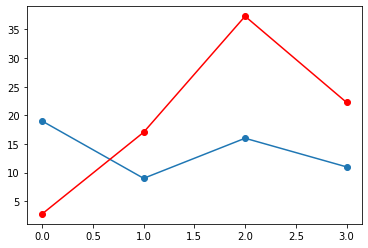

In [285]:
plt.plot(y_test,'o-')
plt.plot(pred2,'o-',color='red')